In [19]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import seaborn as sns
from matplotlib import units

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt



In [20]:

#df = pd.ExcelFile('C:/Users/halil/Desktop/soalr_data.xlsx').parse('sheet 1')
weather_raw = pd.read_excel('C:/Users/halil/Desktop/soalr_data.xlsx',sheet_name="weather")
guneko_raw = pd.read_excel('C:/Users/halil/Desktop/soalr_data.xlsx',sheet_name="1000255-GUNEKO")

guneko_production = guneko_raw[["Date","Production"]]
guneko_gti = guneko_raw[["Date.1","GTI"]]


weather_guneko = weather_raw.loc[weather_raw.name ==1000255]
ali = pd.merge(guneko_production,weather_guneko,left_on="Date",right_on="date")
dataset = ali.drop(["name","date","lat","lon"],axis=1)

In [21]:
conversion = dataset["Date"].astype(str)

dataset["year"] = conversion.apply(lambda x:int(x[:4]))
dataset["month"] = conversion.apply(lambda x:int(x[5:7]))
dataset["day"] = conversion.apply(lambda x:int(x[8:10]))
dataset["hour"] = conversion.apply(lambda x:int(x[11:13]))
onehot_encoded = dataset.drop(["Date"],axis=1)

In [22]:
def normalize(df,column_list):
    for col in column_list:
        feature_range = (0,1)
        min_max_scaler = MinMaxScaler(feature_range=feature_range)
        df[col] = min_max_scaler.fit_transform(df[col].values.reshape(-1,1))

    return df

In [23]:
normalized = normalize(onehot_encoded,onehot_encoded.columns[1:11])
normalized

,Production,temperature,cloud cover,global_rad:W,diffuse_rad:W,direct_rad:W,relative_humidity_2m:p,wind_speed_10m:ms,prob_precip_1h:p,t_apparent:C,sun_elevation:d,year,month,day,hour
0,0.0,0.348214,0.327,0.000000,0.000000,0.000000,0.942166,0.051020,0.0,0.343797,0.005333,2020,1,1,0
1,0.0,0.330357,0.241,0.000000,0.000000,0.000000,0.974763,0.091837,0.0,0.328849,0.006667,2020,1,1,1
2,0.0,0.316071,0.175,0.000000,0.000000,0.000000,0.985279,0.102041,0.0,0.316891,0.063333,2020,1,1,2
3,0.0,0.308929,0.120,0.000000,0.000000,0.000000,0.985279,0.091837,0.0,0.310912,0.133333,2020,1,1,3
4,0.0,0.282143,0.817,0.000000,0.000000,0.000000,1.000000,0.102041,0.0,0.288490,0.212000,2020,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19031,410.0,0.398214,0.822,0.573056,0.676958,0.323005,0.372240,0.377551,0.0,0.439462,0.814000,2022,3,22,11
19032,0.0,0.419643,0.862,0.645313,0.720318,0.385446,0.343849,0.357143,0.0,0.499253,0.849333,2022,3,22,12
19033,0.0,0.430357,0.965,0.525984,0.756413,0.226643,0.348055,0.326531,0.0,0.485800,0.852667,2022,3,22,13
19034,0.0,0.425000,0.992,0.361083,0.665380,0.080047,0.357518,0.244898,0.0,0.458894,0.823333,2022,3,22,14


In [24]:
normalized["hour"].unique() #that means, when we normalize data, normalized data doesnt normalize by function and stay same

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

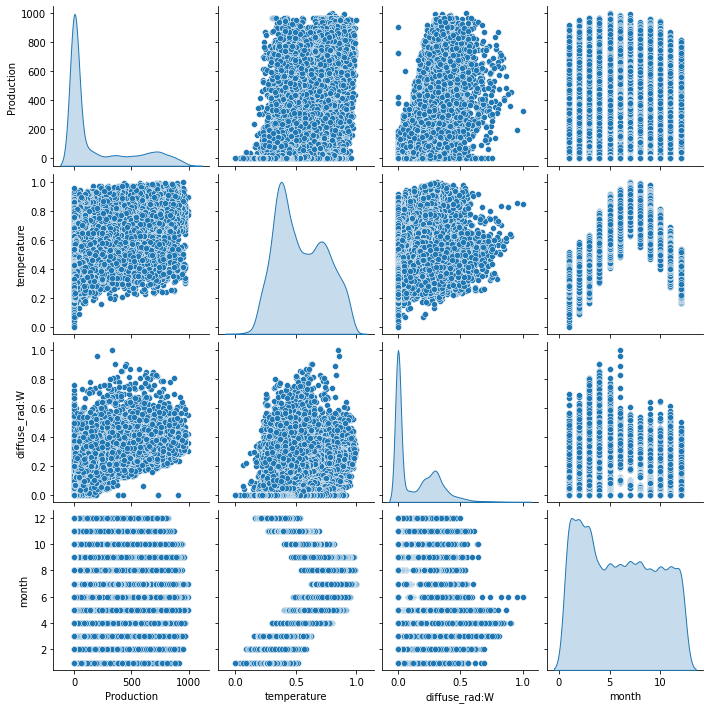

In [25]:
sns.pairplot(normalized[['Production', 'temperature', 'diffuse_rad:W', 'month']], diag_kind='kde')

In [26]:
xler =  normalized["diffuse_rad:W"]
yler = normalized["Production"]
yler

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
19031    410.0
19032      0.0
19033      0.0
19034      0.0
19035      0.0
Name: Production, Length: 19036, dtype: float64

In [28]:
x_train = xler[:int(len(normalized)*0.8)]
x_test = xler[int(len(normalized)*0.8):]

y_train = yler[:int(len(normalized)*0.8)]
y_test = yler[int(len(normalized)*0.8):]



In [31]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()


regr.fit(x_train.values.reshape(-1,1), y_train.values.reshape(-1,1))


LinearRegression()

Coefficients: 
 [[1429.33287397]]
Mean squared error: 39249.08
Coefficient of determination: 0.41


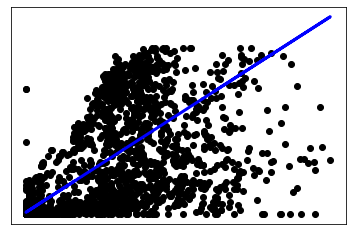

In [33]:
diabetes_y_pred = regr.predict(x_test.values.reshape(-1,1))


print("Coefficients: \n", regr.coef_)

print("Mean squared error: %.2f" % mean_squared_error(y_test, diabetes_y_pred))

print("Coefficient of determination: %.2f" % r2_score(y_test, diabetes_y_pred))


plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()